# STC Jawwy

In [4]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [5]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [6]:
# check the data shape
dataframe.shape

(86, 2)

In [7]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [8]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [9]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [10]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [11]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [13]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [14]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [15]:
import seaborn as sns 

def test_stationarity(df , var):
    df['rollMean']=df[var].rolling(window=12).mean()
    df['rollStd']=df[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(df[var],autolag='AIC')
    testStats=pd.Series(adfTest[0:4], index=['Test Statistic','p-value','# lags used', 'number of observations'])
    print(testStats)


    for key , values in adfTest[4].items():
       print("criticality :",key , values)



    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(data=df,x=df.index,y='rollMean')#yellow 
    sns.lineplot(data=df,x=df.index,y='rollStd')  

Test Statistic            -1.727956
p-value                    0.416769
# lags used                3.000000
number of observations    82.000000
dtype: float64
criticality : 1% -3.512738056978279
criticality : 5% -2.8974898650628984
criticality : 10% -2.585948732897085


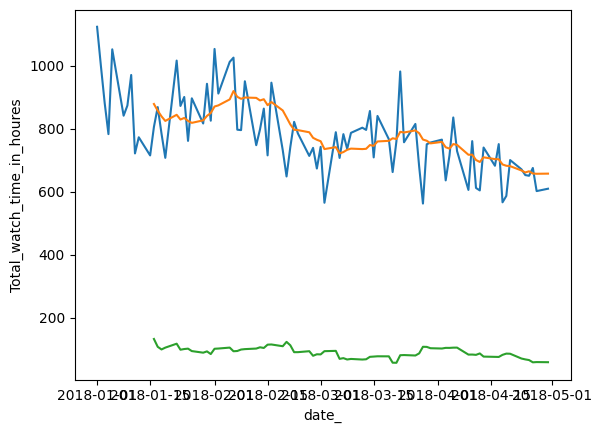

In [16]:
test_stationarity(dataframe,'Total_watch_time_in_houres')#data not statsionary

In [17]:
dfP=dataframe[['Total_watch_time_in_houres']].copy(deep=True)
dfP['firstDiff']=dfP['Total_watch_time_in_houres'].diff()
dfP['Diff2']=dfP['Total_watch_time_in_houres'].diff(2)

In [18]:
dfP.head()

,Total_watch_time_in_houres,firstDiff,Diff2
date_,,,
2018-01-01,1123.551944,NaN,NaN
2018-01-02,1000.129722,-123.422222,NaN
2018-01-03,881.924444,-118.205278,-241.627500
2018-01-04,782.669444,-99.255000,-217.460278
2018-01-05,1051.939444,269.270000,170.015000


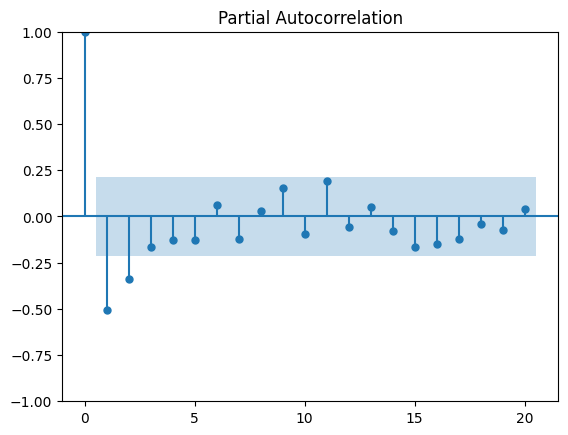

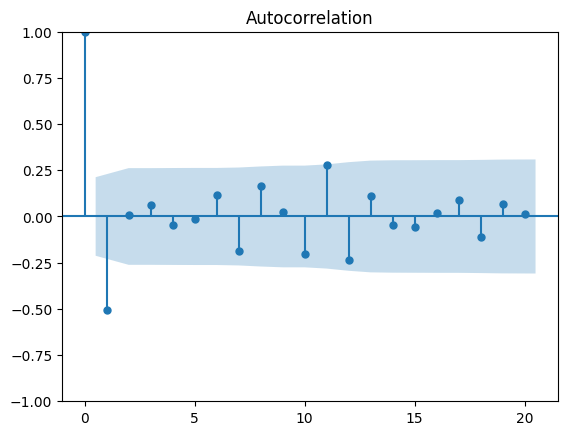

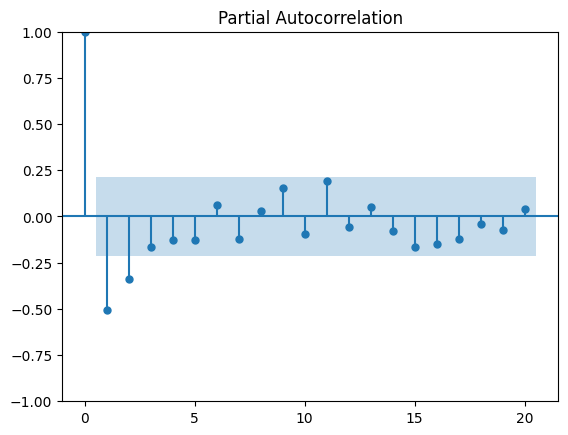

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(dfP['firstDiff'].dropna(),lags=20)
plot_pacf(dfP['firstDiff'].dropna(),lags=20)



In [20]:
train=dfP[:round(len(dfP)*70/100)]
test=dfP[round(len(dfP)*70/100):]

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Total_watch_time_in_houres'],order=(0,1,1), seasonal_order=(0,1,1,12))
modelFit=model.fit()
predi=modelFit.predict(start=test.index[0],end=test.index[-1])
dfP['sarimaxPred']=predi

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



<Axes: xlabel='date_', ylabel='Total_watch_time_in_houres'>

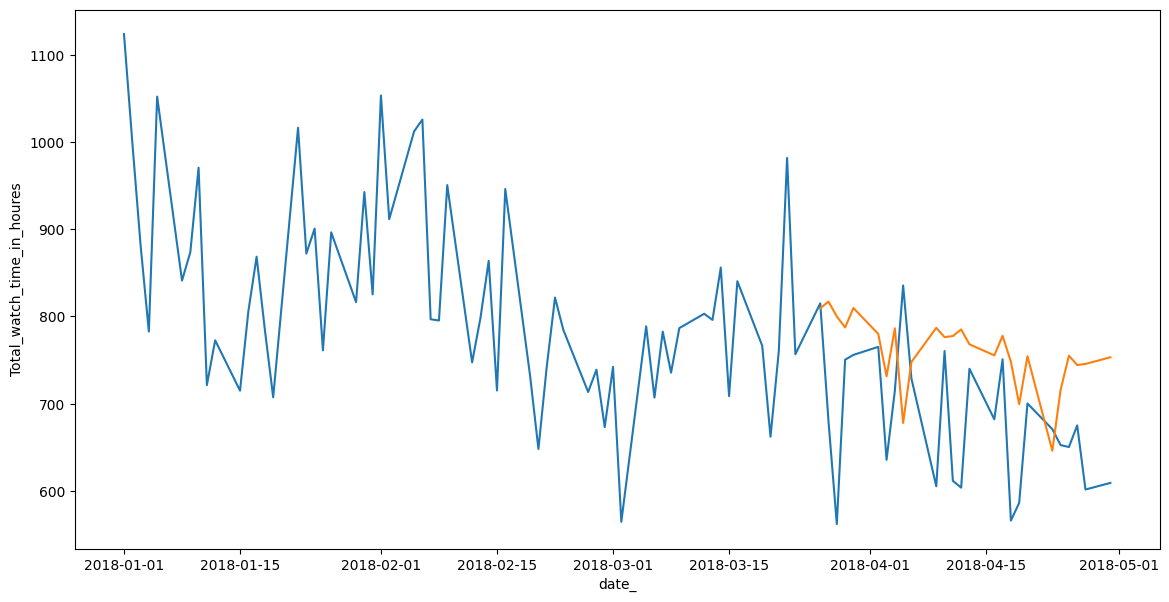

In [22]:
import seaborn as sns
dfP.dropna()
fig = plt.figure(figsize=(14,7)) 
sns.lineplot(data=dfP , x=dfP.index , y='Total_watch_time_in_houres')
sns.lineplot(data=dfP , x=dfP.index , y='sarimaxPred')

In [23]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Total_watch_time_in_houres'],predi))

112.75967707054005

In [30]:
dfP.tail()

,Total_watch_time_in_houres,firstDiff,Diff2,sarimaxPred
date_,,,,
2018-04-24,652.625278,-18.260278,-47.671389,715.945116
2018-04-25,650.428889,-2.196389,-20.456667,755.066743
2018-04-26,675.184444,24.755556,22.559167,744.379316
2018-04-27,601.738056,-73.446389,-48.690833,745.624977
2018-04-30,609.281667,7.543611,-65.902778,753.226995


In [29]:
#find for future data 
dataframe=pd.DataFrame(pd.date_range(start='2018-05-01' , end='2018-06-30' , freq='D'),columns=['Date'])
dataframe.set_index('Date', inplace=True)
dataframe

""
Date
2018-05-01
2018-05-02
2018-05-03
2018-05-04
2018-05-05
...
2018-06-26
2018-06-27
2018-06-28


<Axes: xlabel='date_', ylabel='Total_watch_time_in_houres'>

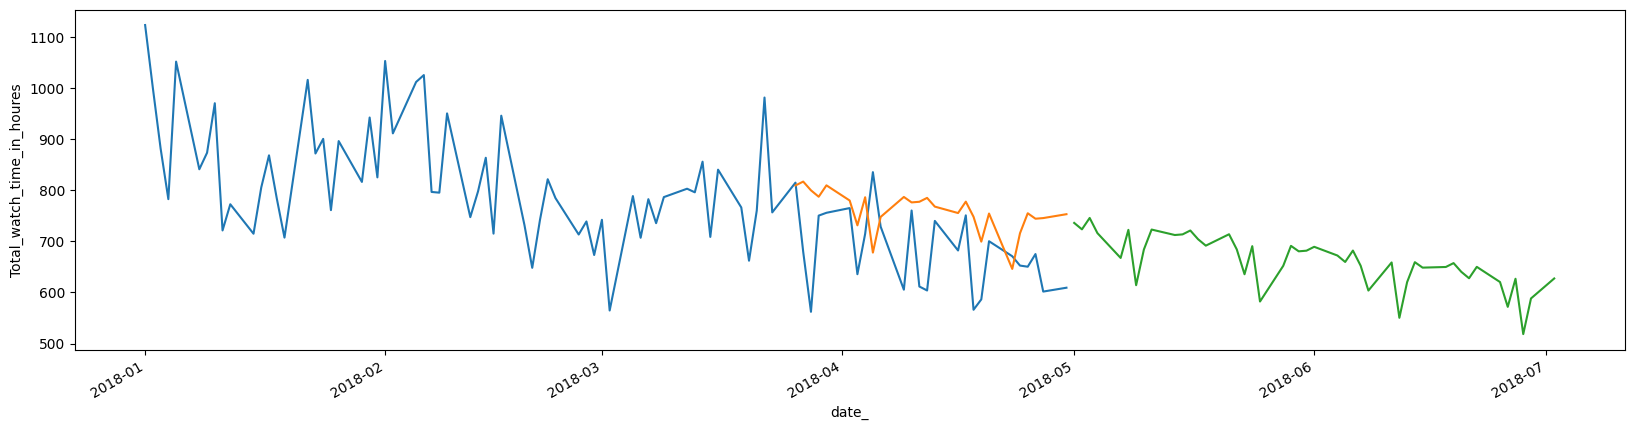

In [35]:
dfP.dropna()
fig = plt.figure(figsize=(20,5)) 
sns.lineplot(data=dfP , x=dfP.index , y='Total_watch_time_in_houres')
sns.lineplot(data=dfP , x=dfP.index , y='sarimaxPred')
modelFit.predict(start=dataframe.index[0], end=dataframe.index[-1]).plot()